In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using JLD2, Plots

In [3]:
using Base: @kwdef

In [4]:
using Random: AbstractRNG

In [5]:
using Statistics: mean

In [6]:
@kwdef struct Args
	nodes::Int = 20
	p_edge::Real = 0.1
	d_vsa::Int = 1024
	rng::AbstractRNG
end

Args

In [7]:
file = "data/" * "result_2023-09-26T21:34:11.683.jld2"

"data/result_2023-09-26T21:34:11.683.jld2"

In [8]:
data = load_object(file)

2-element Vector{Pair{String, Vector}}:
 "arguments" => Args[Args(25, 0.1, 512, Random.Xoshiro(0xad17fbd0cd36cad9, 0xe4d41c7b921cc2bb, 0x0f244ba7a1cb4d0c, 0x39206badf0a5d323)), Args(25, 0.1, 512, Random.Xoshiro(0x939831773e6d9992, 0xea9018f358e4f914, 0xafd96e371068686a, 0x0563f8202a459b83)), Args(25, 0.1, 512, Random.Xoshiro(0x761d9e8b7a194f48, 0x48b9aee60a875aab, 0xee891732c2f4a5f1, 0x97adaf4677231ee1)), Args(25, 0.1, 512, Random.Xoshiro(0x9233ceb4a383300c, 0xd89956f22e283eea, 0x0d719e114932d9a5, 0xdc620b951f9d946c)), Args(25, 0.1, 512, Random.Xoshiro(0xeb4a8e918fe42953, 0x1e242f79878f7304, 0x6f30c5eb2f399ecf, 0x2027e355253a9978)), Args(25, 0.1, 512, Random.Xoshiro(0x66c323c57444b2fa, 0x169d95f71869248c, 0x22b29ff74786e821, 0x2adac704702b2190)), Args(25, 0.2, 512, Random.Xoshiro(0x3210bb20a70a447c, 0xabf7e6511e38a6ac, 0xba7f546ab376b0c2, 0x6d1be95c705bf8fd)), Args(25, 0.2, 512, Random.Xoshiro(0x54ee82ba2bd1093c, 0x75cc156d16ea2df4, 0x4582e3f5b73f47a1, 0x215dcd1f6ca3c6f1)), Args(25, 0.

In [9]:
args = data[1][2];

In [10]:
vals = data[2][2];

In [11]:
p_edges = [arg.p_edge for arg in args]
auroc_static = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [12]:
auroc_static_avg = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [13]:
function average_auroc(p_edges, args, vals)
    ps = sort!(unique(p_edges))
    
    function getmean(p)
        matches = map(x -> x.p_edge == p, args)
        auc = getindex.(vals[matches], 1)
        auc_mean = mean(auc)
        return auc_mean
    end

    return map(getmean, ps)
end

average_auroc (generic function with 1 method)

In [14]:
static_trend = average_auroc(p_edges, args, auroc_static)
dynamic_trend = average_auroc(p_edges, args, auroc_dynamic)

9-element Vector{Float64}:
 0.9997218985400541
 0.9866786952103238
 0.9639355682547933
 0.9432264099799715
 0.932829160312536
 0.9157268016377306
 0.9051668553231127
 0.8961788148925584
 0.866732017429937

In [15]:
p_unique = sort!(unique(p_edges))

9-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9

In [16]:
n_edges = p_edges .* [arg.nodes for arg in args] .^ 2;

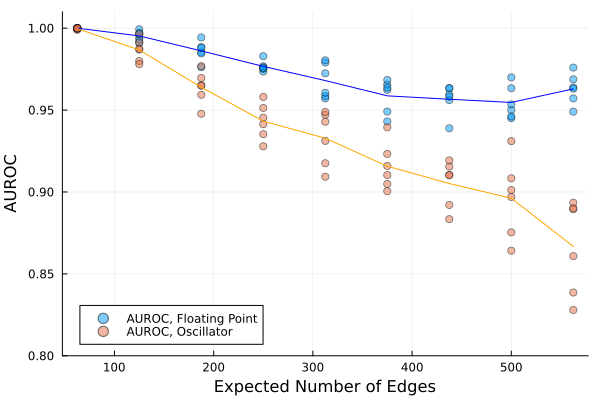

In [20]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
ylims!(0.80, 1.01)

In [21]:
png(fig, "graph_compression.png")

"graph_compression.png"